**Exploring the breast_cancer dataset**

This dataset is one of the built-in datasets in Scikit-learn. According to the Scikit-learn documentation, it has 30 features of 569 samples. The target variable has 2 classes called 0 (not having breast cancer) and 1 (having breast cancer). Since the target variable has only 2 classes, the dataset is used for binary classification. There are no missing values in the dataset. All the values are numerical. Therefore, no cleaning is required!

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Creating the heatmap**

The heatmap can be used to visualize the correlation coefficients of continuous variables with a beautiful colourmap.

<AxesSubplot:>

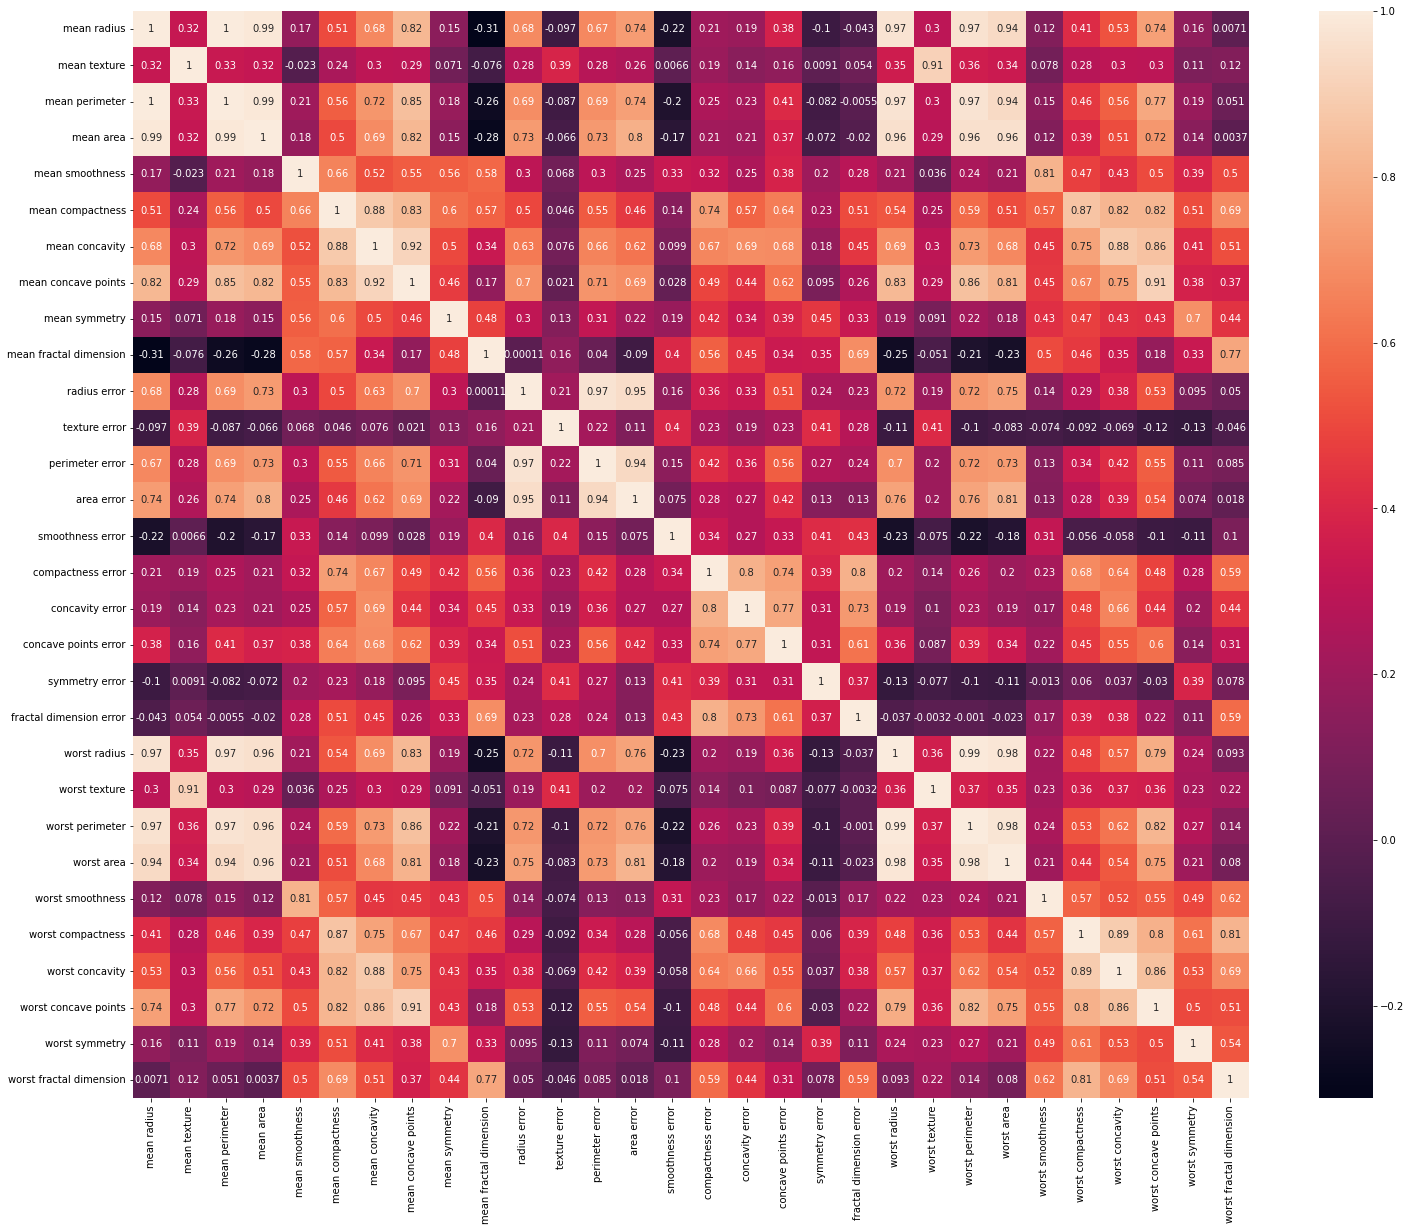

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True)

As you can see in the heatmap, some of the features in the dataset are **highly correlated with each other**. So, there exists multicollinearity.

**Building a logistic regression model (Base model)**

The following code block builds a logistic regression model on breast_cancer data.

Train accuracy: 0.97
Test accuracy: 0.93

Test confusion_matrix


Text(33.0, 0.5, 'True')

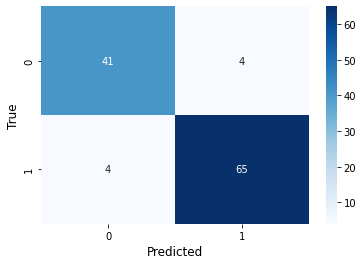

In [8]:
# Define Feature matrix ad Target vector
X = df
y = pd.Series(cancer.target)

#Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=2)

#Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

#Train the model
clf.fit(X_train, y_train)

#Make predictions
y_pred = clf.predict(X_test)
y_true = y_test

#Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

#Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)



## Applying PCA on breast_cancer data

**Overview of PCA**

PCA is a linear dimensionality reduction technique (algorithm) that transforms a set of correlated variables (p) into a smaller k (k<p) number of uncorrelated variables called principal components while retaining as much of the variation in the original dataset as possible. In the context of Machine Learning (ML), PCA is an unsupervised machine learning algorithm which is used for dimensionality reduction. If the variables are not measured on a similar scale, we need to do feature scaling before applying PCA for our data. This is because PCA directions are highly sensitive to the scale of the data. The most important part in PCA is selecting the best number of components for the given dataset.

**Selecting the best number of PCs for our data**

First, we apply PCA keeping all components equal to the original number of dimensions (i.e., 30) and see how well PCA captures the variance of our data.

[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]


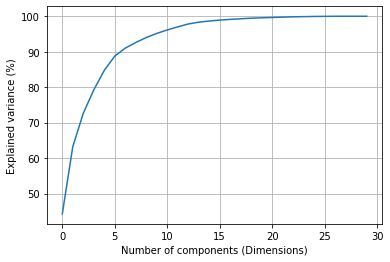

In [26]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

#Mostrando la suma acumulada del ratio de la varianza explicada
print(np.cumsum(pca.explained_variance_ratio_*100))

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.grid()

The first component alone captures about 44% variability in the data and the second one captures about 19% variability in the data and so on. The first 6 components together capture about 88.76% variability in the data. We’re interested to keep the first 6 components.

**Running PCA again with 6 components**

Now, we get the transformed dataset with 6 components. For this, we need to run PCA again by setting **n_components=6.**

In [27]:
#Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

#Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

#Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)


          0          1         2         3         4         5
0  9.192837   1.948583 -1.123166  3.633731 -1.195109  1.411416
1  2.387802  -3.768172 -0.529293  1.118264  0.621774  0.028665
2  5.733896  -1.075174 -0.551748  0.912083 -0.177085  0.541447
3  7.122953  10.275589 -3.232790  0.152547 -2.960879  3.053422
4  3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226496

Size: 
(569, 6)


Now, we can use this transformed dataset instead of the original breast_cancer dataset to build a logistic regression model. Here are the differences between the two datasets.

* The original dataset has 30 features while the transformed dataset has 6 components.
* The transformed dataset only captures about 88.76% variability in the original dataset.
* The corresponding values of the two datasets are completely different.
* Some variables in the original dataset are highly correlated with one or more of the other variables (multicollinearity). No variable in the transformed dataset is correlated with one or more of the other variables.

**Creating the heatmap of the transformed dataset**

<AxesSubplot:>

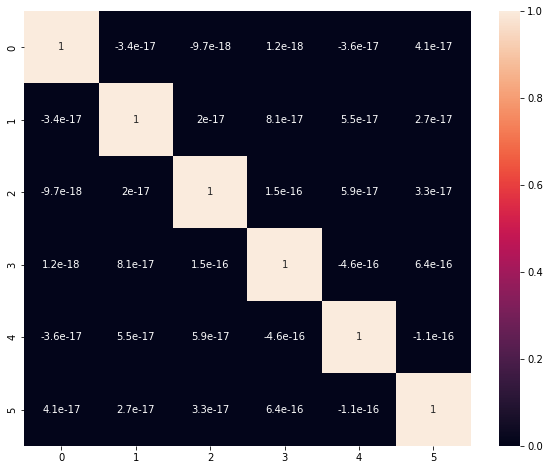

In [28]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(),annot=True)

We **cannot see any correlation between components**. This is because PCA has transformed the set of correlated variables in the original dataset into a set of **uncorrelated variables.**

**Building a logistic regression model on the transformed data**

The following code block builds a logistic regression model on the transformed dataset (the dataset obtained by applying PCA).

Train accuracy:  0.98
Test accuracy:  0.96

Test confusion matrix


Text(33.0, 0.5, 'True')

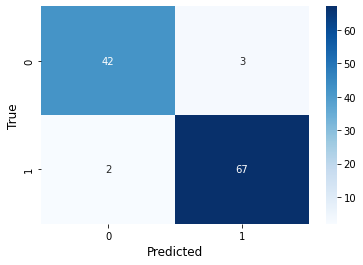

In [33]:
#Make train and test sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, shuffle=True, random_state=2)

#Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(max_iter=2500)

#Train the model
clf.fit(X_train_pca, y_train)

#Make predictions
y_pred = clf.predict(X_test_pca)
y_true = y_test

#Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy: ", np.round(accuracy_score(y_train, clf.predict(X_train_pca)),2))
print("Test accuracy: ", np.round(accuracy_score(y_true, y_pred),2))

#Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

You can compare this output with the previous output of our base model. The test accuracy **has increased by 3%**. Both false positives and false negatives have also been reduced. However, the transformed dataset (the dataset obtained by applying PCA), only captures about 88.76% variability in the original dataset. Therefore, what’s the reason behind the performance increase in this model? The obvious answer is PCA has effectively eliminated the **multicollinearity!**

Tutorial tomado de: [How do you apply PCA to Logistic Regression to remove Multicollinearity?](https://towardsdatascience.com/how-do-you-apply-pca-to-logistic-regression-to-remove-multicollinearity-10b7f8e89f9b)